# Data Science and Business Analytics Intern #GRIPMAR21

## Author - Sakshi Gupta

## Task-4 : Exploratory Data Analysis - Terrorism

## The task is to perform Exploratory Data Analysis on Global Terrorism dataset and as a
## security/defence analyst try to find out the hot zone of terrorism.

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Correlation between all the features

In [6]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,0.178567,-0.000269,-0.084599,...,0.006337,0.029833,-0.025997,-0.037097,0.012434,-0.044331,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.309274,0.004351,-0.084198,...,0.022671,0.026652,0.022046,-0.077758,0.200913,-0.149511,-0.082584,-0.071917,0.043139,-0.047900
latitude,0.166886,0.166933,-0.015978,0.003423,-0.024749,0.178567,0.309274,1.000000,0.001463,-0.018811,...,0.059222,0.027321,0.015425,0.042891,0.059493,0.002790,-0.099827,-0.094470,0.097652,-0.041530
longitude,0.003907,0.003917,-0.003880,-0.002285,0.000523,-0.000269,0.004351,0.001463,1.000000,0.001065,...,0.006354,0.016375,-0.021610,-0.119913,0.093693,-0.017745,0.002272,0.002268,0.000371,0.002497
specificity,0.030641,0.030626,0.003621,-0.006991,0.057897,-0.084599,-0.084198,-0.018811,0.001065,1.000000,...,-0.015019,-0.015824,-0.035069,-0.042140,0.027030,-0.030631,0.073022,0.071333,-0.019197,0.061389


### Countries affected by Terrorist Attacks

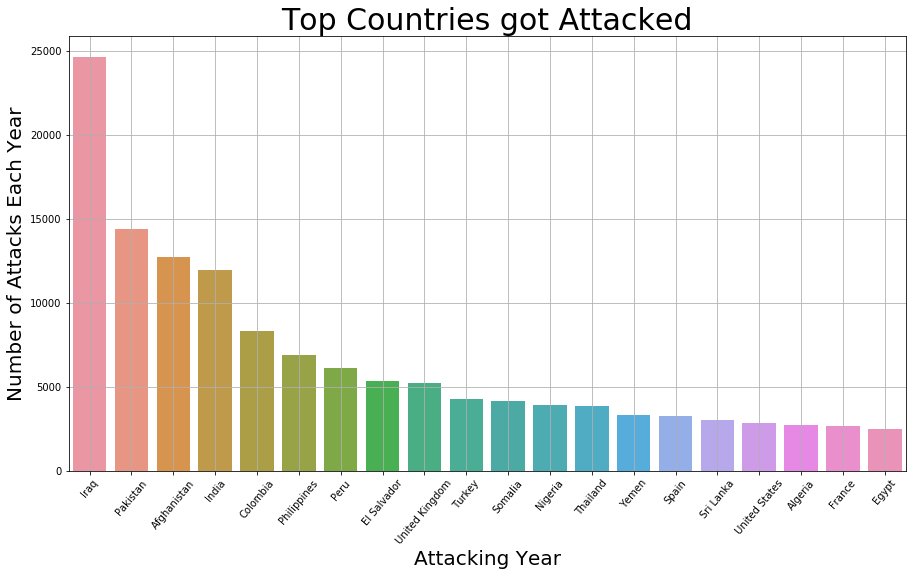

In [12]:
df['country_txt'].value_counts()
plt.figure(figsize = (15,8))
sns.barplot(x=df['country_txt'].value_counts()[:20].index,y=df['country_txt'].value_counts()[:20].values)
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Top Countries got Attacked',fontsize=30)
plt.grid()
plt.show()

### Region attacked by Terrorist Attack

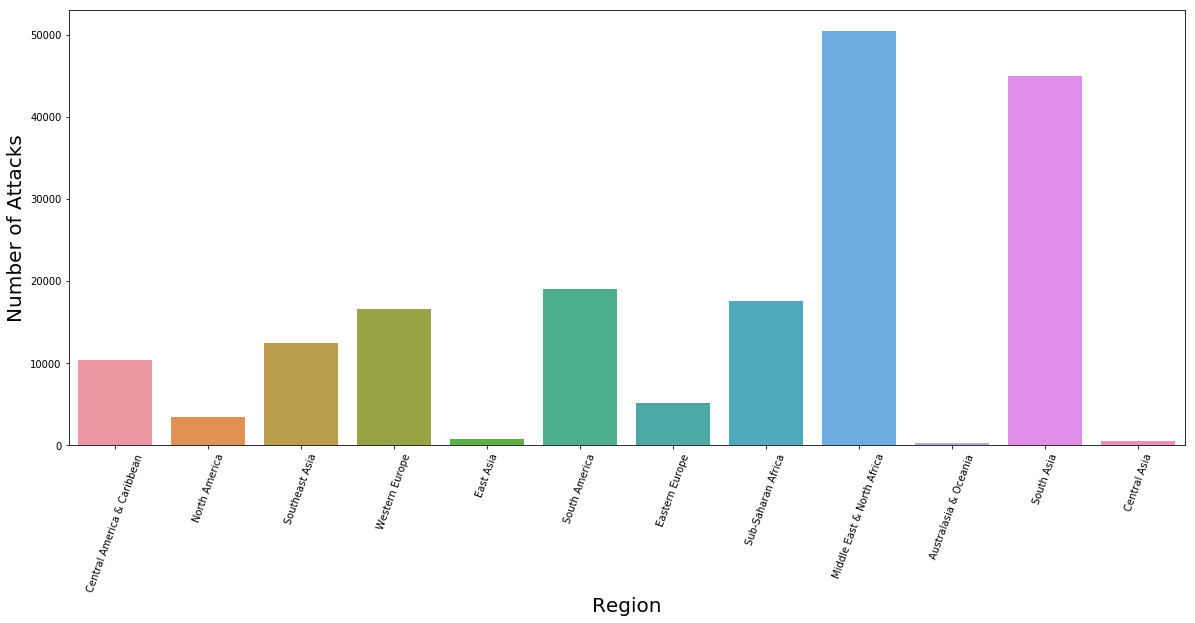

In [14]:
df['region_txt'].value_counts()
plt.figure(figsize=(20,8))
sns.countplot(x='region_txt',data=df)
plt.xticks(rotation = 70) 
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.show()


In [15]:
df['city'].value_counts()

Unknown                  9775
Baghdad                  7589
Karachi                  2652
Lima                     2359
Mosul                    2265
Belfast                  2171
Santiago                 1621
Mogadishu                1581
San Salvador             1558
Istanbul                 1048
Athens                   1019
Bogota                    984
Kirkuk                    925
Beirut                    918
Medellin                  848
Benghazi                  840
Peshawar                  819
Quetta                    803
Guatemala City            755
Baqubah                   745
Kabul                     738
Srinagar                  658
Jerusalem                 636
Paris                     612
Fallujah                  582
Tripoli                   565
Dhaka                     557
Rome                      551
Arish                     521
Ramadi                    509
                         ... 
Aadsheet al-Qaseer          1
La Base                     1
Ghar Tin  

### Number of attack from 1970 to 2017

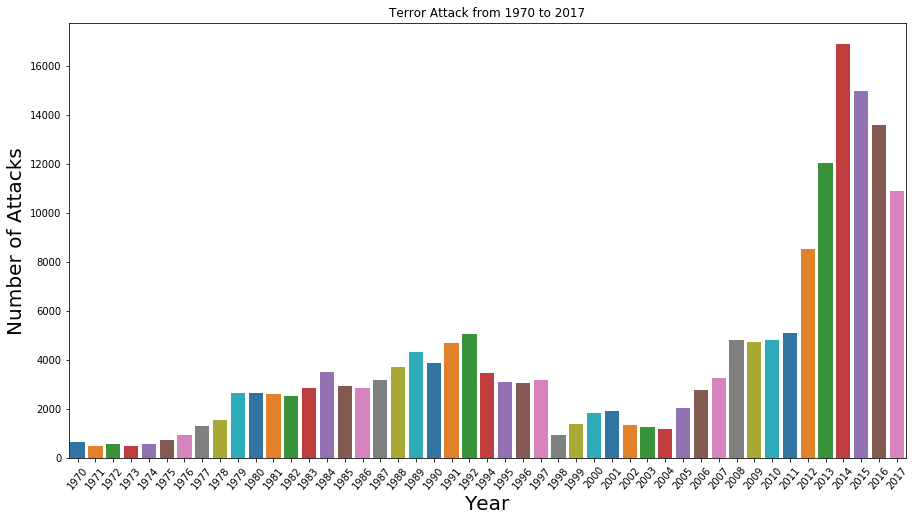

In [18]:
plt.subplots(figsize=(15,8))
sns.countplot(x='iyear',data=df,palette='tab10')
plt.xticks(rotation=50)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.title("Terror Attack from 1970 to 2017")
plt.show()

### Attack Type

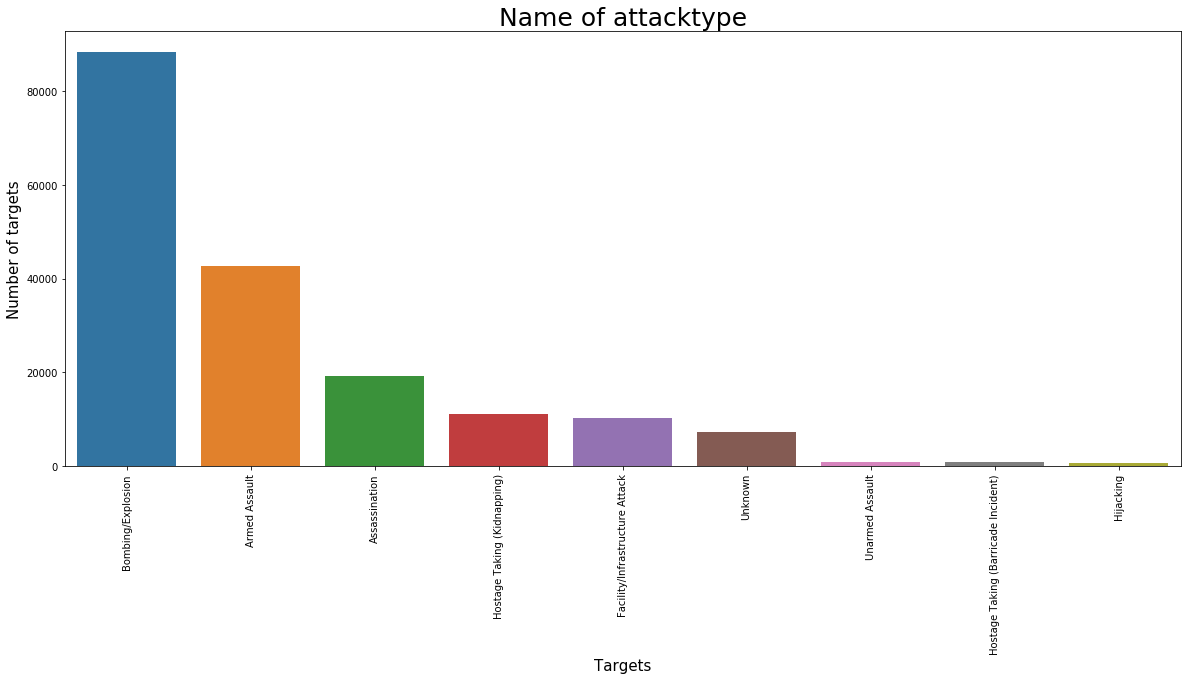

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['attacktype1_txt'],order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation =90)
plt.xlabel("Targets",fontsize=15)
plt.ylabel("Number of targets",size=15)
plt.title("Name of attacktype",fontsize=25)
plt.show()

### Group Attack

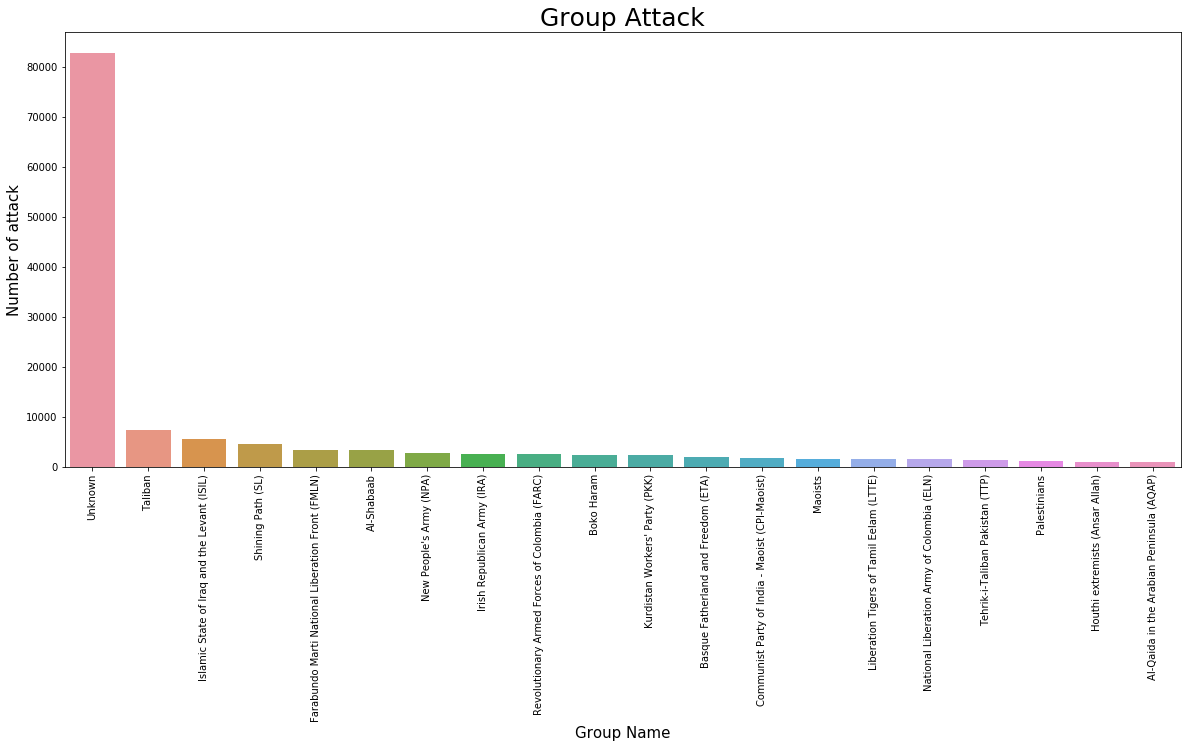

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['gname'].value_counts()[:20].index,y=df['gname'].value_counts()[:20].values)
plt.xticks(rotation = 90)
plt.xlabel("Group Name",fontsize=15)
plt.ylabel("Number of attack",size=15)
plt.title("Group Attack",fontsize=25)
plt.show()

### Cities Affected By Terrorist

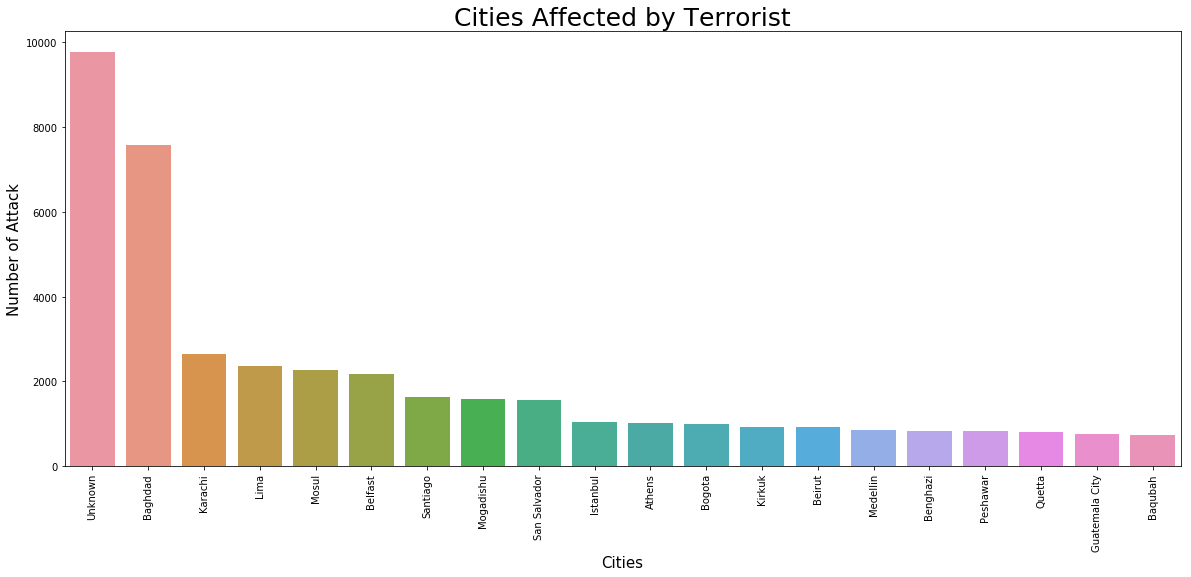

In [27]:
df['city'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=df['city'].value_counts()[:20].index,y=df['city'].value_counts()[:20])
plt.xticks(rotation =90)
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Number of Attack",size=15)
plt.title("Cities Affected by Terrorist",fontsize=25)
plt.show()


### Weapon Usage

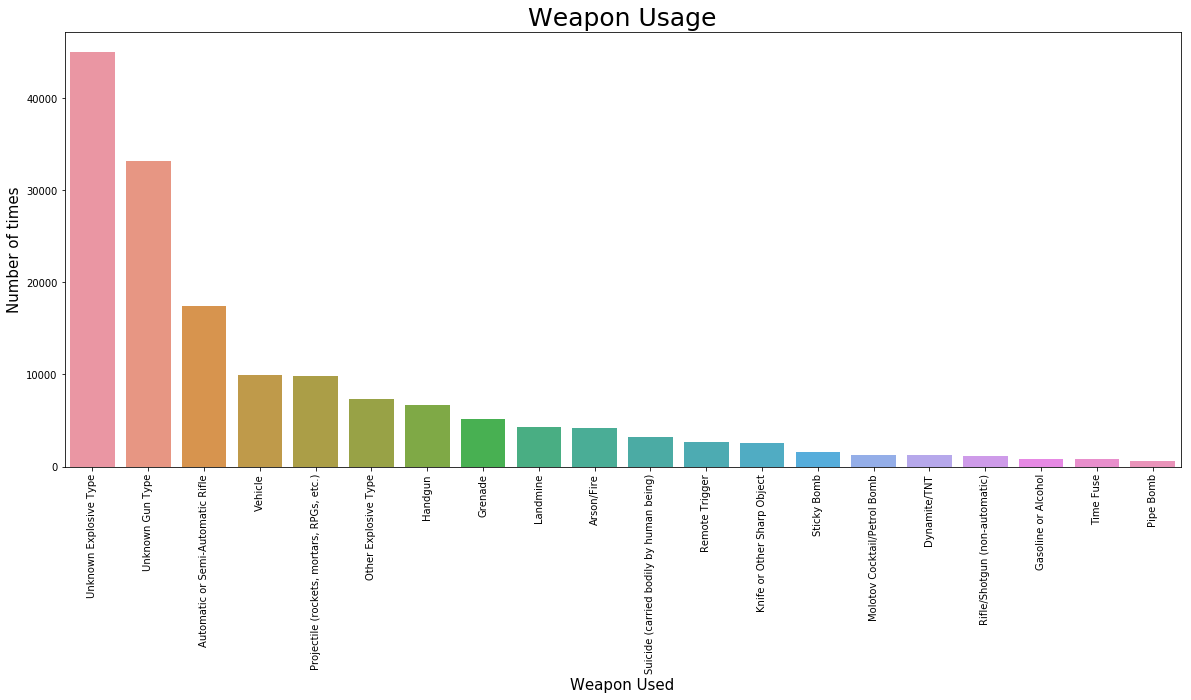

In [30]:
df['weapsubtype1_txt'].value_counts()
plt.figure(figsize=(20,8))
color=['blue','green','yellow','red']
sns.barplot(x=df['weapsubtype1_txt'].value_counts()[:20].index,y=df['weapsubtype1_txt'].value_counts()[:20].values)
plt.xticks(rotation =90)
plt.xlabel("Weapon Used",fontsize=15)
plt.ylabel("Number of times",size=15)
plt.title("Weapon Usage",fontsize=25)
plt.show()

### Conclusion :

#### 1.Top Country with the most attacks: Iraq
#### 2.City with the most number of attacks: Baghdad
#### 3.Region with the most attacks: Middle East & North Africa
#### 4.Year with the most attacks: 2014
#### 5.Group with the most attacks: Taliban
#### 6.Most Number of Attack Types: Bombing/Explosion

### Task-4 Completed 


## Thank You